In [1]:
import keras
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras as K
from tensorflow.keras import layers


2023-09-18 14:26:18.585950: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
# cargamos los datos 
with open('../../data/datasets/noisy_sine_dataset.npz', 'rb') as f:
    X = np.load(f)
    y = np.load(f)

In [3]:
X

array([-10.        ,  -9.97997998,  -9.95995996,  -9.93993994,
        -9.91991992,  -9.8998999 ,  -9.87987988,  -9.85985986,
        -9.83983984,  -9.81981982,  -9.7997998 ,  -9.77977978,
        -9.75975976,  -9.73973974,  -9.71971972,  -9.6996997 ,
        -9.67967968,  -9.65965966,  -9.63963964,  -9.61961962,
        -9.5995996 ,  -9.57957958,  -9.55955956,  -9.53953954,
        -9.51951952,  -9.4994995 ,  -9.47947948,  -9.45945946,
        -9.43943944,  -9.41941942,  -9.3993994 ,  -9.37937938,
        -9.35935936,  -9.33933934,  -9.31931932,  -9.2992993 ,
        -9.27927928,  -9.25925926,  -9.23923924,  -9.21921922,
        -9.1991992 ,  -9.17917918,  -9.15915916,  -9.13913914,
        -9.11911912,  -9.0990991 ,  -9.07907908,  -9.05905906,
        -9.03903904,  -9.01901902,  -8.998999  ,  -8.97897898,
        -8.95895896,  -8.93893894,  -8.91891892,  -8.8988989 ,
        -8.87887888,  -8.85885886,  -8.83883884,  -8.81881882,
        -8.7987988 ,  -8.77877878,  -8.75875876,  -8.73

In [21]:
# creamos el modelo de RNA
model = K.Sequential()

model.add(layers.Dense(units=1, activation='linear', input_shape=[1]))
model.add(layers.Dense(units=8, activation='relu'))
model.add(layers.Dense(units=8, activation='relu'))
model.add(layers.Dense(units=8, activation='relu'))
model.add(layers.Dense(units=8, activation='relu'))
model.add(layers.Dense(units=1, activation='linear'))

model.compile(loss='mse', optimizer='adam')

model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_23 (Dense)            (None, 1)                 2         
                                                                 
 dense_24 (Dense)            (None, 8)                 16        
                                                                 
 dense_25 (Dense)            (None, 8)                 72        
                                                                 
 dense_26 (Dense)            (None, 8)                 72        
                                                                 
 dense_27 (Dense)            (None, 8)                 72        
                                                                 
 dense_28 (Dense)            (None, 1)                 9         
                                                                 
Total params: 243 (972.00 Byte)
Trainable params: 243 

In [25]:
model.fit(X, y, epochs=500, verbose=1)

Epoch 1/500
32/32 [==============================] - 0s 2ms/step - loss: 0.0766
Epoch 2/500
32/32 [==============================] - 0s 2ms/step - loss: 0.0754
Epoch 3/500
32/32 [==============================] - 0s 3ms/step - loss: 0.0763
Epoch 4/500
32/32 [==============================] - 0s 2ms/step - loss: 0.0742
Epoch 5/500
32/32 [==============================] - 0s 3ms/step - loss: 0.0741
Epoch 6/500
32/32 [==============================] - 0s 3ms/step - loss: 0.0726
Epoch 7/500
32/32 [==============================] - 0s 3ms/step - loss: 0.0713
Epoch 8/500
32/32 [==============================] - 0s 3ms/step - loss: 0.0693
Epoch 9/500
32/32 [==============================] - 0s 3ms/step - loss: 0.0699
Epoch 10/500
32/32 [==============================] - 0s 2ms/step - loss: 0.0689
Epoch 11/500
32/32 [==============================] - 0s 3ms/step - loss: 0.0681
Epoch 12/500
32/32 [==============================] - 0s 2ms/step - loss: 0.0661
Epoch 13/500
32/32 [=================

In [26]:
y_predicted = model.predict(X)

32/32 [==============================] - 0s 1ms/step


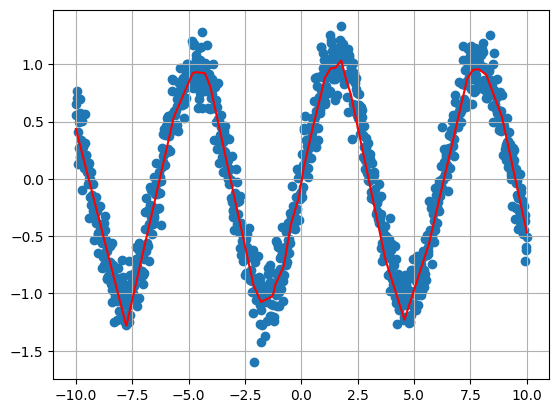

In [27]:
plt.scatter(X, y)
plt.plot(X, y_predicted, 'r-')
plt.grid(True)
plt.show()

In [28]:
for i, layer in enumerate(model.layers):
    print('*'*25)
    print(model.layers[i].weights)

*************************
[<tf.Variable 'dense_23/kernel:0' shape=(1, 1) dtype=float32, numpy=array([[0.9934777]], dtype=float32)>, <tf.Variable 'dense_23/bias:0' shape=(1,) dtype=float32, numpy=array([0.2269069], dtype=float32)>]
*************************
[<tf.Variable 'dense_24/kernel:0' shape=(1, 8) dtype=float32, numpy=
array([[-0.2429808 , -0.271639  , -0.11433487,  0.10783515,  0.5232482 ,
         0.18335184,  0.2977355 , -0.45194545]], dtype=float32)>, <tf.Variable 'dense_24/bias:0' shape=(8,) dtype=float32, numpy=
array([-1.3110499 ,  0.4713191 ,  0.24816526,  0.16807395, -0.915504  ,
        0.10019822,  0.2944005 , -0.47506693], dtype=float32)>]
*************************
[<tf.Variable 'dense_25/kernel:0' shape=(8, 8) dtype=float32, numpy=
array([[-0.40667424, -0.63056016,  0.18903375, -1.3929884 ,  0.83022255,
        -0.633642  , -0.10637075,  0.01537321],
       [ 0.35009292,  0.08702921, -0.3529556 ,  0.47467974,  0.5850814 ,
         0.4350653 , -0.3145338 ,  0.10494236]